In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("Obesity.csv")

In [52]:
df.loc[df['Gender'] == 'Male', 'Sex'] = 1
df.loc[df['Gender'] == 'Female', 'Sex'] = 0

In [53]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Sex'],
      dtype='object')

In [54]:
df = df.drop(['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'], axis = 1)

Note: Body Mass Index (BMI) was
calculated dividing weight in kg by (height * height) in metre square

In [55]:
df['BMI'] = df["Weight"]/ (df["Height"] * df["Height"])

Note: Body Fat % = − 44.988 + (0.503 × age) + (10.689 × sex) +
(3.172 × BMI) - (0.026 × BMI2
) + (0.181 × BMI × sex) -
(0.02 × BMI × age) - (0.005 × BMI2
 × sex) + (0.00021 ×
BMI2
 × age), where, BMI = body mass index, male = 0 and
female = 1 for sex

In [56]:
df["body_fat"] = -44.988 + (0.503 * df["Age"]) + (10.689 * df["Sex"]) + (3.172 * df["BMI"]) - (0.026 * df["BMI"] * df["BMI"]) + (0.181 * df["BMI"] * df["Sex"]) - (0.02 * df["BMI"] * df["Age"]) - (0.005 * df["BMI"] * df["BMI"] * df["Sex"]) + (0.00021 * df["BMI"] * df["BMI"] * df["Age"])

In [57]:
df["body_fat"].describe()

count    2111.000000
mean       32.935562
std        12.847703
min        -3.522734
25%        23.285277
50%        35.246980
75%        43.809730
max        56.204440
Name: body_fat, dtype: float64

Note:
The female
subjects whose BMI ≥ 25 kg/m2
 correspond to body fat >
32% were classified into overweight group and BMI < 25
kg/m2
 correspond to body fat ≤ 32% were classified into no
overweight group. Considering BMI ≥ 25 kg/m2
 correspond
to body fat > 23%, the male subjects were classified into
overweight group and BMI < 25 kg/m2
 correspond to body
fat ≤ 23% were classified into no overweight group [10, 15,
16]. 

In [58]:
def overweight_cal(x):
  if x['Gender'] == 'Male' and x['BMI'] >= 25 and x["body_fat"] > 23: return 1
  elif x['Gender'] == 'Male' and x['BMI'] < 25 and x["body_fat"] < 23: return 0
  elif x['Gender'] == 'Female' and x['BMI'] >= 25 and x["body_fat"] > 23: return 1
  else: return 0

df['Overweight'] = df.apply(overweight_cal, axis=1)

In [59]:
df.head(10)

,Gender,Age,Height,Weight,Sex,BMI,body_fat,Overweight
0,Female,21.0,1.62,64.0,0.0,24.386526,19.847090,0
1,Female,21.0,1.52,56.0,0.0,24.238227,19.594656,0
2,Male,23.0,1.80,77.0,1.0,23.765432,31.242690,0
3,Male,27.0,1.80,87.0,1.0,26.851852,36.552773,1
4,Male,22.0,1.78,89.8,1.0,28.342381,38.137551,1
5,Male,29.0,1.62,53.0,1.0,20.195092,26.129653,0
6,Female,23.0,1.50,55.0,0.0,24.444444,20.224605,0
7,Male,22.0,1.64,53.0,1.0,19.705532,23.925651,0
8,Male,24.0,1.78,64.0,1.0,20.199470,25.213914,0
9,Male,22.0,1.72,68.0,1.0,22.985398,29.786157,0


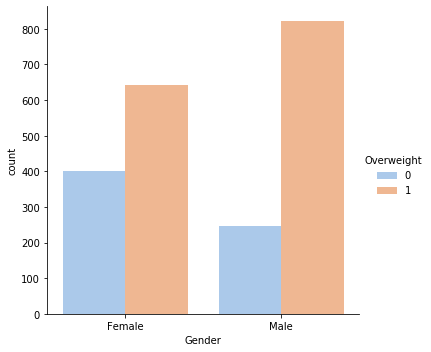

In [60]:
import seaborn as sns
sns.catplot(x = "Gender", hue = "Overweight", kind="count",
            palette = "pastel", data = df)

Chi square test between categorical variables: overweight and gender

In [61]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [62]:
import researchpy as rp
import scipy.stats as stats
rp.summary_cat(df[["Gender", "Overweight"]])

,Variable,Outcome,Count,Percent
0,Gender,Male,1068,50.59
1,,Female,1043,49.41
2,Overweight,1,1464,69.35
3,,0,647,30.65


In [63]:
crosstab = pd.crosstab(df["Gender"], df["Overweight"])

crosstab

Overweight,0,1
Gender,,
Female,401,642
Male,246,822


The first value is the χ2 test static, the second value is the p-value, and the third number is the degrees of freedom. An array is also returned which contains the expected cell counts.

In [64]:
stats.chi2_contingency(crosstab)

(58.25336309755055,
 2.304427005959004e-14,
 1,
 array([[319.66887731, 723.33112269],
        [327.33112269, 740.66887731]]))

There is a relationship between Overweight and the Gender group, χ2(1) = 58.21, p < 0.0001.

In [65]:
crosstab, test_results, expected = rp.crosstab(df["Gender"], df["Overweight"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Overweight               
Overweight          0      1     All
Gender                              
Female          19.00  30.41   49.41
Male            11.65  38.94   50.59
All             30.65  69.35  100.00

In [66]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,58.9763
1,p-value =,0.0000
2,Cramer's phi =,0.1671


In [67]:
expected

Overweight            
Overweight           0           1
Gender                            
Female      319.668877  723.331123
Male        327.331123  740.668877

ASSUMPTION CHECK
Checking the assumptions for the χ2 test of independence is easy. Let's recall what they are:

The two samples are independent

The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other.

No expected cell count is = 0
No more than 20% of the cells have and expected cell count < 5.

Cramer's phi value > 0.15, hence the relationship is strong.

In [68]:
grouped_df = df.groupby(["Overweight"]).count()
grouped_df["percent_overweight"] = (grouped_df["Gender"] * 100)/ grouped_df['Gender'].sum()

Finding the overweight percent in the whole sample

In [69]:
grouped_df

,Gender,Age,Height,Weight,Sex,BMI,body_fat,percent_overweight
Overweight,,,,,,,,
0,647,647,647,647,647,647,647,30.648982
1,1464,1464,1464,1464,1464,1464,1464,69.351018


Pearson's correlation coefficient was used to determine the
relationship between BMI and BF% with the continuous
explanatory variables

In [70]:
corr = df.corr(method = 'pearson')
corr.style.background_gradient(cmap = 'coolwarm')

,Age,Height,Weight,Sex,BMI,body_fat,Overweight
Age,1.000000,-0.025958,0.202560,0.048394,0.244163,0.316694,0.370772
Height,-0.025958,1.000000,0.463136,0.618466,0.131785,0.393595,0.161323
Weight,0.202560,0.463136,1.000000,0.161668,0.934806,0.899336,0.725173
Sex,0.048394,0.618466,0.161668,1.000000,-0.053035,0.439351,0.167145
BMI,0.244163,0.131785,0.934806,-0.053035,1.000000,0.863272,0.759360
body_fat,0.316694,0.393595,0.899336,0.439351,0.863272,1.000000,0.805089
Overweight,0.370772,0.161323,0.725173,0.167145,0.759360,0.805089,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D673604508>,
      dtype=object)

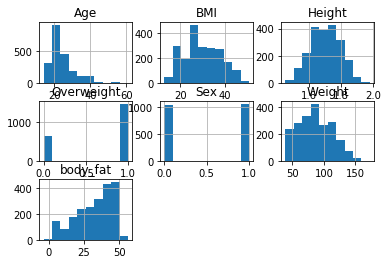

In [71]:
df.hist()

In [81]:
y = df["Overweight"]
X = df[["Sex", "Age", "Height", "Weight", "body_fat", "BMI"]]

In [82]:
X

,Sex,Age,Height,Weight,body_fat,BMI
0,0.0,21.000000,1.620000,64.000000,19.847090,24.386526
1,0.0,21.000000,1.520000,56.000000,19.594656,24.238227
2,1.0,23.000000,1.800000,77.000000,31.242690,23.765432
3,1.0,27.000000,1.800000,87.000000,36.552773,26.851852
4,1.0,22.000000,1.780000,89.800000,38.137551,28.342381
...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,45.614687,44.901475
2107,0.0,21.982942,1.748584,133.742943,44.672875,43.741923
2108,0.0,22.524036,1.752206,133.689352,44.517736,43.543817
2109,0.0,24.361936,1.739450,133.346641,45.024620,44.071535


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [84]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

I:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[170,   1],
       [  2, 355]], dtype=int64)

In [86]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 257.44, 'Predicted label')

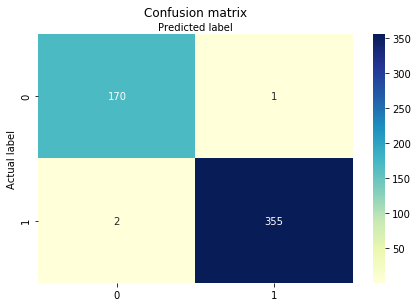

In [87]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9943181818181818
Precision: 0.9971910112359551
Recall: 0.9943977591036415


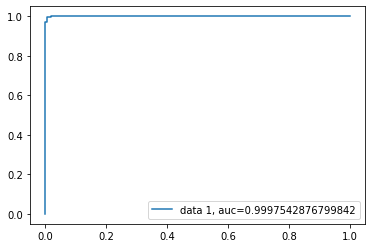

In [89]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()